In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load CSV files into DataFrames
transactions_df = pd.read_csv('Transactions.csv')
customers_df = pd.read_csv('Customers.csv')
products_df = pd.read_csv('Products.csv')

# Preview the data
print("Transactions Data:")
print(transactions_df.head())

print("\nCustomers Data:")
print(customers_df.head())

print("\nProducts Data:")
print(products_df.head())


Transactions Data:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68  

Customers Data:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Data:
  ProductID      

In [ ]:
# Merge the DataFrames
# Step 1: Merge Transactions with Customers on 'CustomerID'
transactions_customers_df = pd.merge(transactions_df, customers_df, on='CustomerID', how='inner')

# Step 2: Merge the result with Products on 'ProductID'
full_df = pd.merge(transactions_customers_df, products_df, on='ProductID', how='inner')

# Preview the resulting DataFrame
print("Merged DataFrame:")
print(full_df.head())

# Save the merged DataFrame to a new CSV file if needed
full_df.to_csv('Merged_DataFrame.csv', index=False)


Merged DataFrame:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region  SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe  2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia  2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe  2024-04-04   
3      601.36   300.68  Travis Campbell  South America  2024-04-11   
4      902.04   300.68    Timothy Perez         Europe  2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLiving

In [ ]:
print(f"Number of rows in the merged DataFrame: {full_df.shape[0]}")

# Display the column names and their data types
print("\nColumn names and their data types:")
print(full_df.dtypes)

Number of rows in the merged DataFrame: 1000

Column names and their data types:
TransactionID       object
CustomerID          object
ProductID           object
TransactionDate     object
Quantity             int64
TotalValue         float64
Price_x            float64
CustomerName        object
Region              object
SignupDate          object
ProductName         object
Category            object
Price_y            float64
dtype: object


In [ ]:
# Drop the Price_y column
full_df = full_df.drop(columns=["Price_y"])

# Rename Price_x to Price
full_df = full_df.rename(columns={"Price_x": "Price"})

# Display the updated DataFrame's columns
print(full_df.columns)


Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price', 'CustomerName', 'Region',
       'SignupDate', 'ProductName', 'Category'],
      dtype='object')


In [ ]:
missing_values = full_df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
CustomerName       0
Region             0
SignupDate         0
ProductName        0
Category           0
dtype: int64


In [ ]:
duplicates = full_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [ ]:
# Summary statistics for numeric columns
print("Summary Statistics:\n", full_df.describe())

# Count of unique values in each column
unique_counts = full_df.nunique()
print("Unique Counts:\n", unique_counts)


Summary Statistics:
           Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000
Unique Counts:
 TransactionID      1000
CustomerID          199
ProductID           100
TransactionDate    1000
Quantity              4
TotalValue          369
Price               100
CustomerName        199
Region                4
SignupDate          178
ProductName          66
Category              4
dtype: int64


In [ ]:
# Calculate total transactions and unique customers
total_transactions = full_df.shape[0]  # Number of rows (transactions)
unique_customers = full_df['CustomerID'].nunique()  # Unique Customer IDs

print(f"Total Transactions: {total_transactions}")
print(f"Unique Customers: {unique_customers}")


Total Transactions: 1000
Unique Customers: 199


<ipython-input-27-e69dabc0189a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=region_summary, x='Region', y='Transactions', palette='viridis')


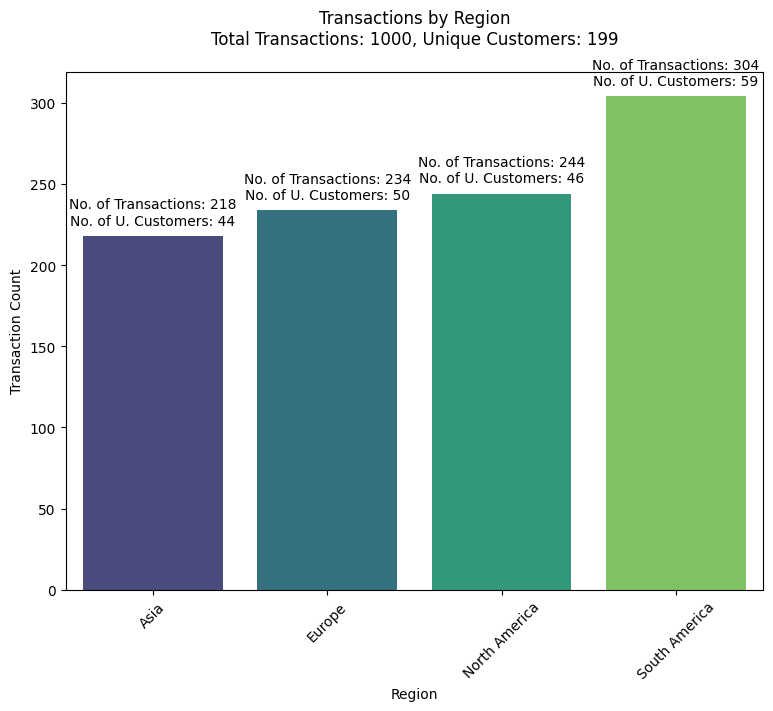

In [ ]:
# Transactions by Region
region_summary = full_df.groupby('Region').agg(
    Transactions=('TransactionID', 'count'),
    UniqueCustomers=('CustomerID', 'nunique')
).reset_index()

plt.figure(figsize=(9, 7))
ax = sns.barplot(data=region_summary, x='Region', y='Transactions', palette='viridis')

# Add annotations for each bar
for i, row in region_summary.iterrows():
    ax.text(
        i, row['Transactions'] + 5,
        f"No. of Transactions: {row['Transactions']}\nNo. of U. Customers: {row['UniqueCustomers']}",
        ha='center', va='bottom', fontsize=10
    )

# Add padding to the top for title
plt.subplots_adjust(top=0.85)

# Set title with enough space
plt.title(
    f'Transactions by Region\nTotal Transactions: {total_transactions}, Unique Customers: {unique_customers}',
    pad=20
)
plt.xlabel('Region')
plt.ylabel('Transaction Count')
plt.xticks(rotation=45)
plt.show()


Total Unique Signup Dates: 178
Signup Dates in Ascending Order: 2022-01-22, 2022-02-02, 2022-02-10, 2022-02-13, 2022-02-19, 2022-02-25, 2022-02-27, 2022-03-04, 2022-03-07, 2022-03-14, 2022-03-15, 2022-03-20, 2022-03-23, 2022-03-29, 2022-04-05, 2022-04-07, 2022-04-09, 2022-04-16, 2022-04-19, 2022-04-22, 2022-05-06, 2022-05-09, 2022-05-13, 2022-05-15, 2022-05-16, 2022-05-17, 2022-05-27, 2022-06-05, 2022-06-07, 2022-06-17, 2022-06-18, 2022-07-01, 2022-07-04, 2022-07-07, 2022-07-10, 2022-08-06, 2022-08-15, 2022-08-20, 2022-08-23, 2022-09-13, 2022-09-15, 2022-09-16, 2022-09-18, 2022-09-22, 2022-09-28, 2022-10-06, 2022-10-09, 2022-10-16, 2022-11-03, 2022-11-09, 2022-11-18, 2022-12-03, 2022-12-12, 2022-12-13, 2022-12-14, 2022-12-15, 2022-12-16, 2022-12-18, 2023-01-12, 2023-01-13, 2023-01-21, 2023-01-29, 2023-02-01, 2023-02-03, 2023-02-04, 2023-02-05, 2023-02-07, 2023-02-23, 2023-03-04, 2023-03-06, 2023-03-11, 2023-03-15, 2023-03-16, 2023-03-21, 2023-03-23, 2023-04-04, 2023-04-12, 2023-04-13, 

<ipython-input-33-a241f646b6d2>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=signup_date_counts.head(10), x='SignupDate', y='Transactions', palette='cool')


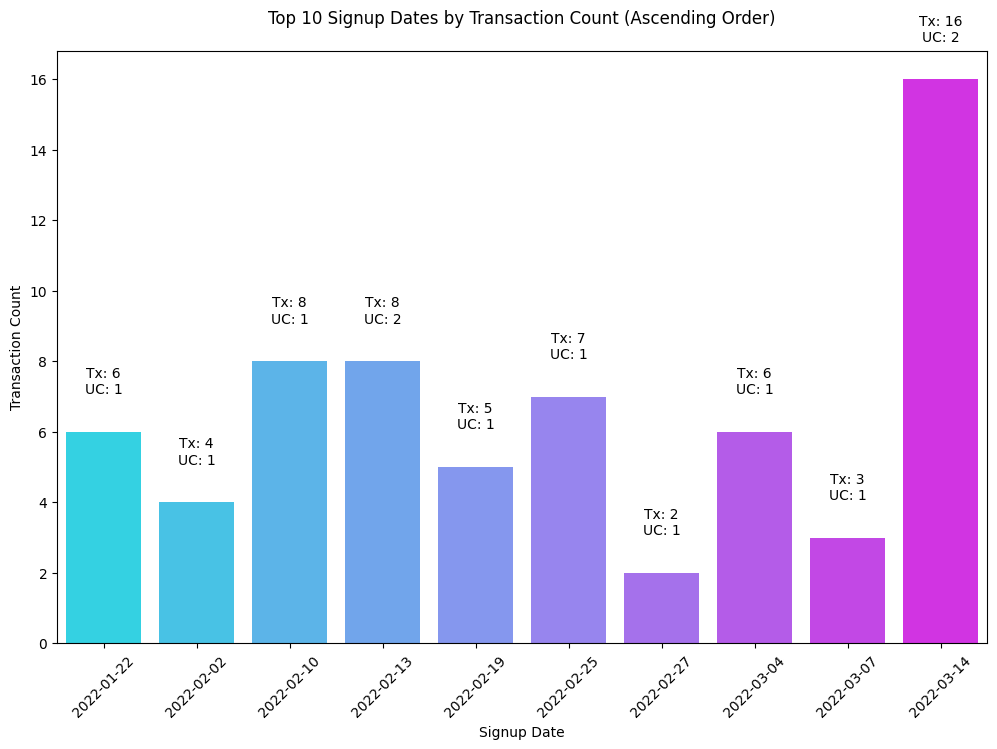

In [ ]:
# Transactions by Signup Date (sorted by ascending dates)
signup_date_counts = full_df.groupby('SignupDate').agg(
    Transactions=('TransactionID', 'count'),
    UniqueCustomers=('CustomerID', 'nunique')
).reset_index()

# Sort signup dates in ascending order
signup_date_counts = signup_date_counts.sort_values(by='SignupDate')

# Get total unique signup dates
unique_signup_dates = full_df['SignupDate'].nunique()
print(f"Total Unique Signup Dates: {unique_signup_dates}")

# Display the unique dates in ascending order in the console
signup_dates_list = sorted(full_df['SignupDate'].unique())
print(f"Signup Dates in Ascending Order: {', '.join(map(str, signup_dates_list))}")

# Prepare bar graph
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=signup_date_counts.head(10), x='SignupDate', y='Transactions', palette='cool')

# Add annotations for each bar
for i, row in signup_date_counts.head(10).iterrows():
    ax.text(
        i, row['Transactions'] + 1,
        f"Tx: {row['Transactions']}\nUC: {row['UniqueCustomers']}",
        ha='center', va='bottom', fontsize=10
    )

# Add title and labels with proper spacing
plt.title('Top 10 Signup Dates by Transaction Count (Ascending Order)', pad=20)
plt.xlabel('Signup Date')
plt.ylabel('Transaction Count')
plt.xticks(rotation=45)

# Adjust layout to fit the annotations and title
plt.subplots_adjust(top=0.85)
plt.show()


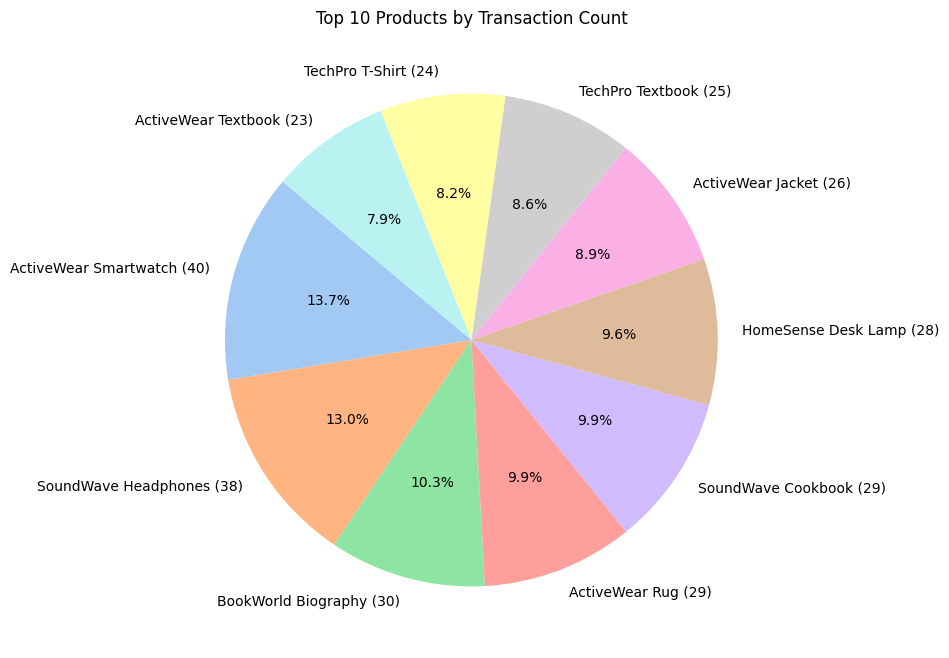

In [ ]:
# Transactions by Product Name (Top 10 for readability)
product_counts = full_df['ProductName'].value_counts().head(10)

# Create labels with transaction numbers
labels_with_counts = [f"{product} ({count})" for product, count in zip(product_counts.index, product_counts.values)]

# Prepare the pie chart
plt.figure(figsize=(8, 8))
product_counts.plot(
    kind='pie',
    labels=labels_with_counts,  # Use updated labels
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('pastel')
)

plt.title('Top 10 Products by Transaction Count')
plt.ylabel('')  # Hide y-label for cleaner visualization
plt.show()
# Transactions by Product Name (Top 10 for readability)
product_counts = full_df['ProductName'].value_counts().head(7)



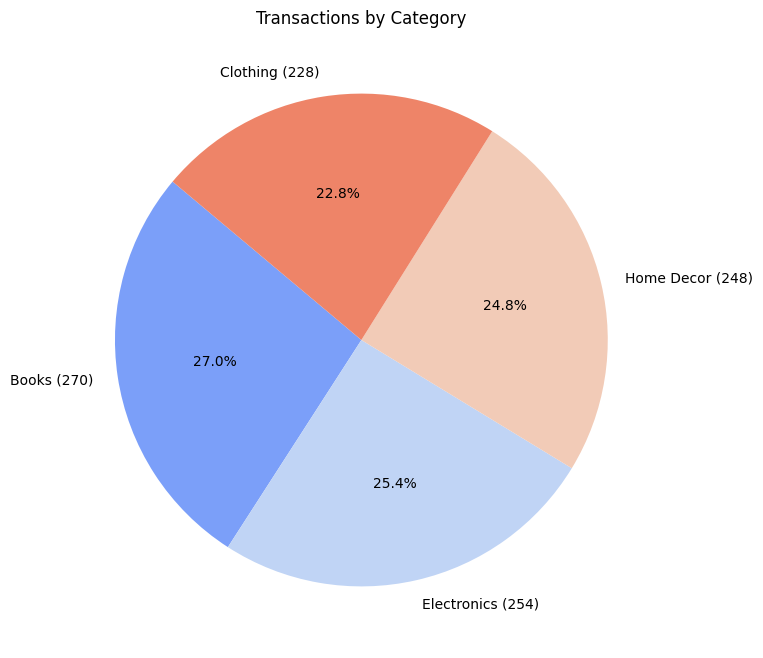

In [ ]:
# Transactions by Category
category_counts = full_df['Category'].value_counts()

# Create labels with transaction numbers
labels_with_counts = [f"{category} ({count})" for category, count in zip(category_counts.index, category_counts.values)]

# Prepare the pie chart
plt.figure(figsize=(8, 8))
category_counts.plot(
    kind='pie',
    labels=labels_with_counts,  # Use updated labels with transaction counts
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('coolwarm', len(category_counts))
)

plt.title('Transactions by Category')
plt.ylabel('')  # Hide y-label for cleaner visualization
plt.show()


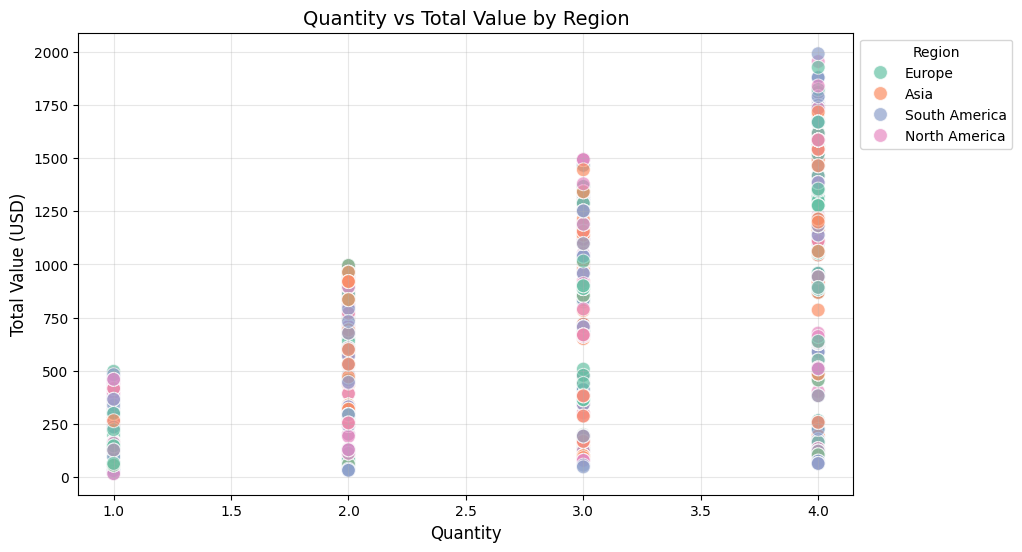

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=full_df, x='Quantity', y='TotalValue', hue='Region', palette='Set2', s=100, alpha=0.7)
plt.title('Quantity vs Total Value by Region', fontsize=14)
plt.xlabel('Quantity', fontsize=12)
plt.ylabel('Total Value (USD)', fontsize=12)
plt.legend(title='Region', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(alpha=0.3)
plt.show()

<ipython-input-50-b97a4fa8d13e>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  transactions_by_range = full_df.groupby('ValueRange')['TransactionID'].count()
<ipython-input-50-b97a4fa8d13e>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=transactions_by_range.index, y=transactions_by_range.values, palette='mako')


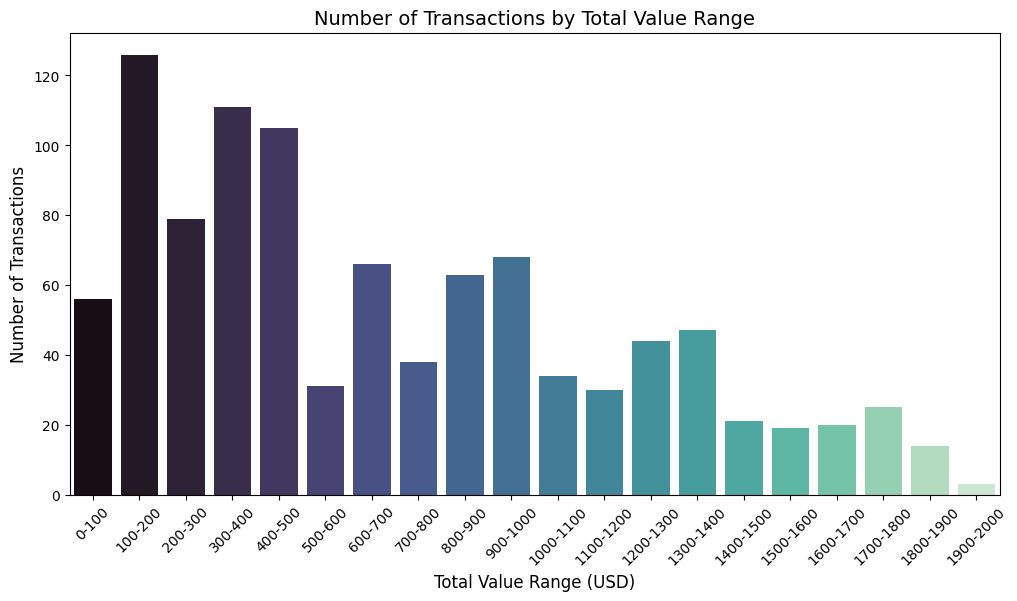

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define bins and labels
bins = range(0, int(full_df['TotalValue'].max()) + 100, 100)  # Adjust bin size (100 in this case)
labels = [f'{i}-{i+100}' for i in bins[:-1]]

# Create a new column for TotalValue bins
full_df['ValueRange'] = pd.cut(full_df['TotalValue'], bins=bins, labels=labels, right=False)

# Count transactions in each range
transactions_by_range = full_df.groupby('ValueRange')['TransactionID'].count()

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=transactions_by_range.index, y=transactions_by_range.values, palette='mako')
plt.title('Number of Transactions by Total Value Range', fontsize=14)
plt.xlabel('Total Value Range (USD)', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


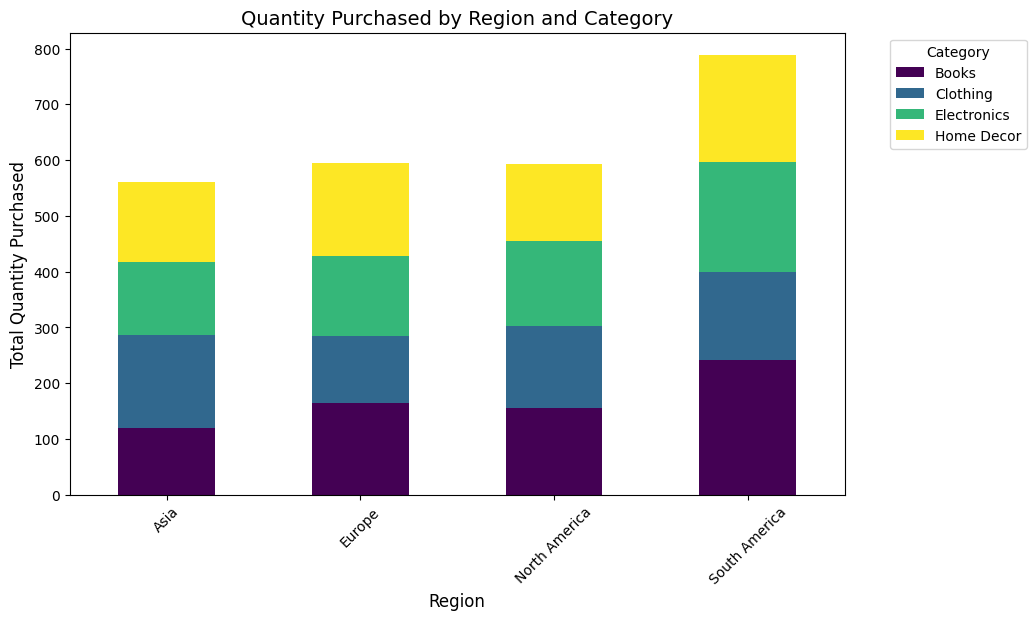

In [ ]:
3# Group data by Region and Category, summing up the Quantity
region_category_quantity = full_df.groupby(['Region', 'Category'])['Quantity'].sum().unstack()

# Plot the stacked bar chart
region_category_quantity.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Quantity Purchased by Region and Category', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Quantity Purchased', fontsize=12)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

# Calculate total quantity sold for each product
top_products = (
    full_df.groupby('ProductName')['Quantity']
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index
)

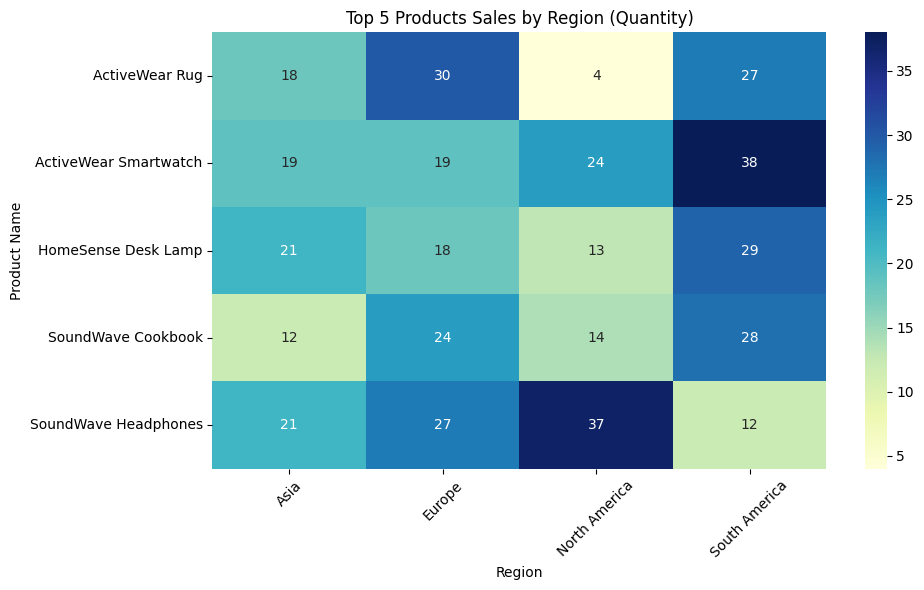

In [ ]:
# Filter the DataFrame for only the top 5 products
filtered_df = full_df[full_df['ProductName'].isin(top_products)]

# Pivot the data for visualization
pivot = filtered_df.pivot_table(index='ProductName', columns='Region', values='Quantity', aggfunc='sum', fill_value=0)

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, cmap='YlGnBu', fmt='.0f', cbar=True)
plt.title("Top 5 Products Sales by Region (Quantity)")
plt.ylabel("Product Name")
plt.xlabel("Region")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

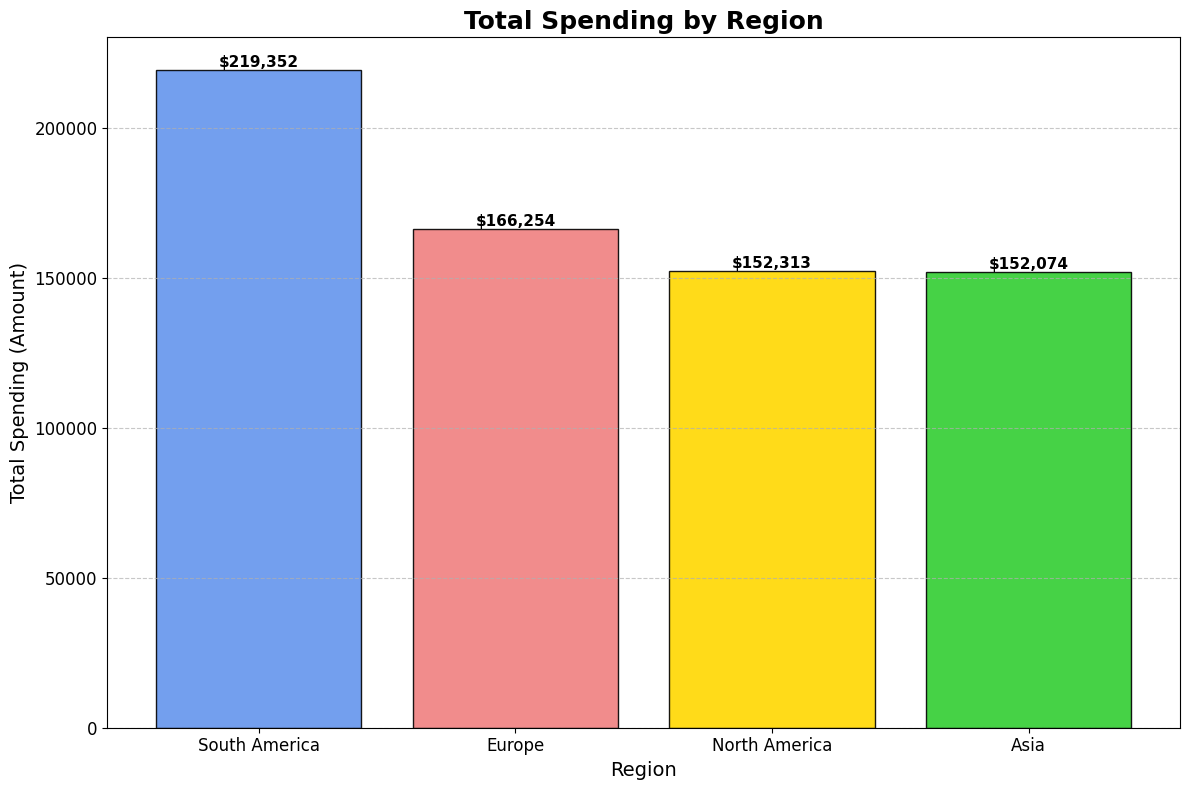

In [ ]:
# Group by 'Region' and calculate the total amount spent
region_spending = full_df.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)

# Define a unique color for each bar
colors = ['cornflowerblue', 'lightcoral', 'gold', 'limegreen', 'mediumpurple']

# Plotting the bar chart
plt.figure(figsize=(12, 8))
bars = plt.bar(region_spending.index, region_spending.values, color=colors[:len(region_spending)], edgecolor='black', alpha=0.9)

# Add values on top of each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'${int(bar.get_height()):,}',
             ha='center', va='bottom', fontsize=11, fontweight='bold', color='black')

# Adding titles and labels
plt.title("Total Spending by Region", fontsize=18, fontweight='bold')
plt.xlabel("Region", fontsize=14)
plt.ylabel("Total Spending (Amount)", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Enhance layout
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

<ipython-input-58-d61c77ba9f32>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_sales, x='Category', y='TotalValue', palette='Blues_d')


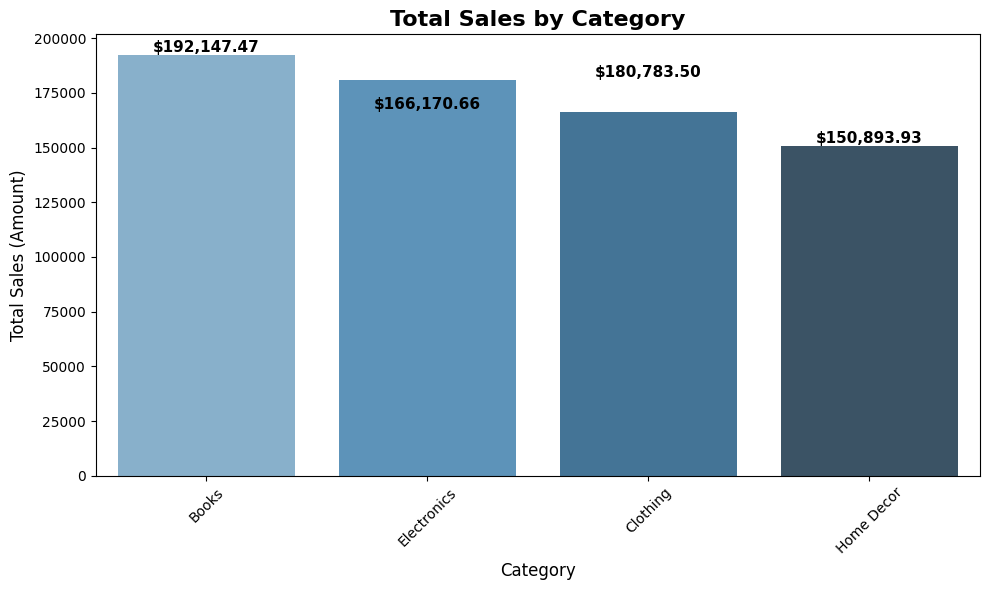

In [ ]:
# Group by Category and calculate the total amount of sales (TotalValue)
category_sales = full_df.groupby('Category')['TotalValue'].sum().reset_index()

# Sort the categories by sales for better visualization
category_sales = category_sales.sort_values(by='TotalValue', ascending=False)

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=category_sales, x='Category', y='TotalValue', palette='Blues_d')

# Add values on top of each bar
for i, row in category_sales.iterrows():
    plt.text(
        i, row['TotalValue'], f"${row['TotalValue']:,.2f}",
        ha='center', va='bottom', fontsize=11, fontweight='bold', color='black'
    )

# Customize the plot
plt.title("Total Sales by Category", fontsize=16, fontweight='bold')
plt.xlabel("Category", fontsize=12)
plt.ylabel("Total Sales (Amount)", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()

<ipython-input-64-b3b21da29b11>:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(5, 'Quantity'))
<ipython-input-64-b3b21da29b11>:24: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
<ipython-input-64-b3b21da29b11>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-64-b3b21da29b11>:24: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
<ipython-input-64-b3b21da29b11>:24: FutureWarning: 

Pass

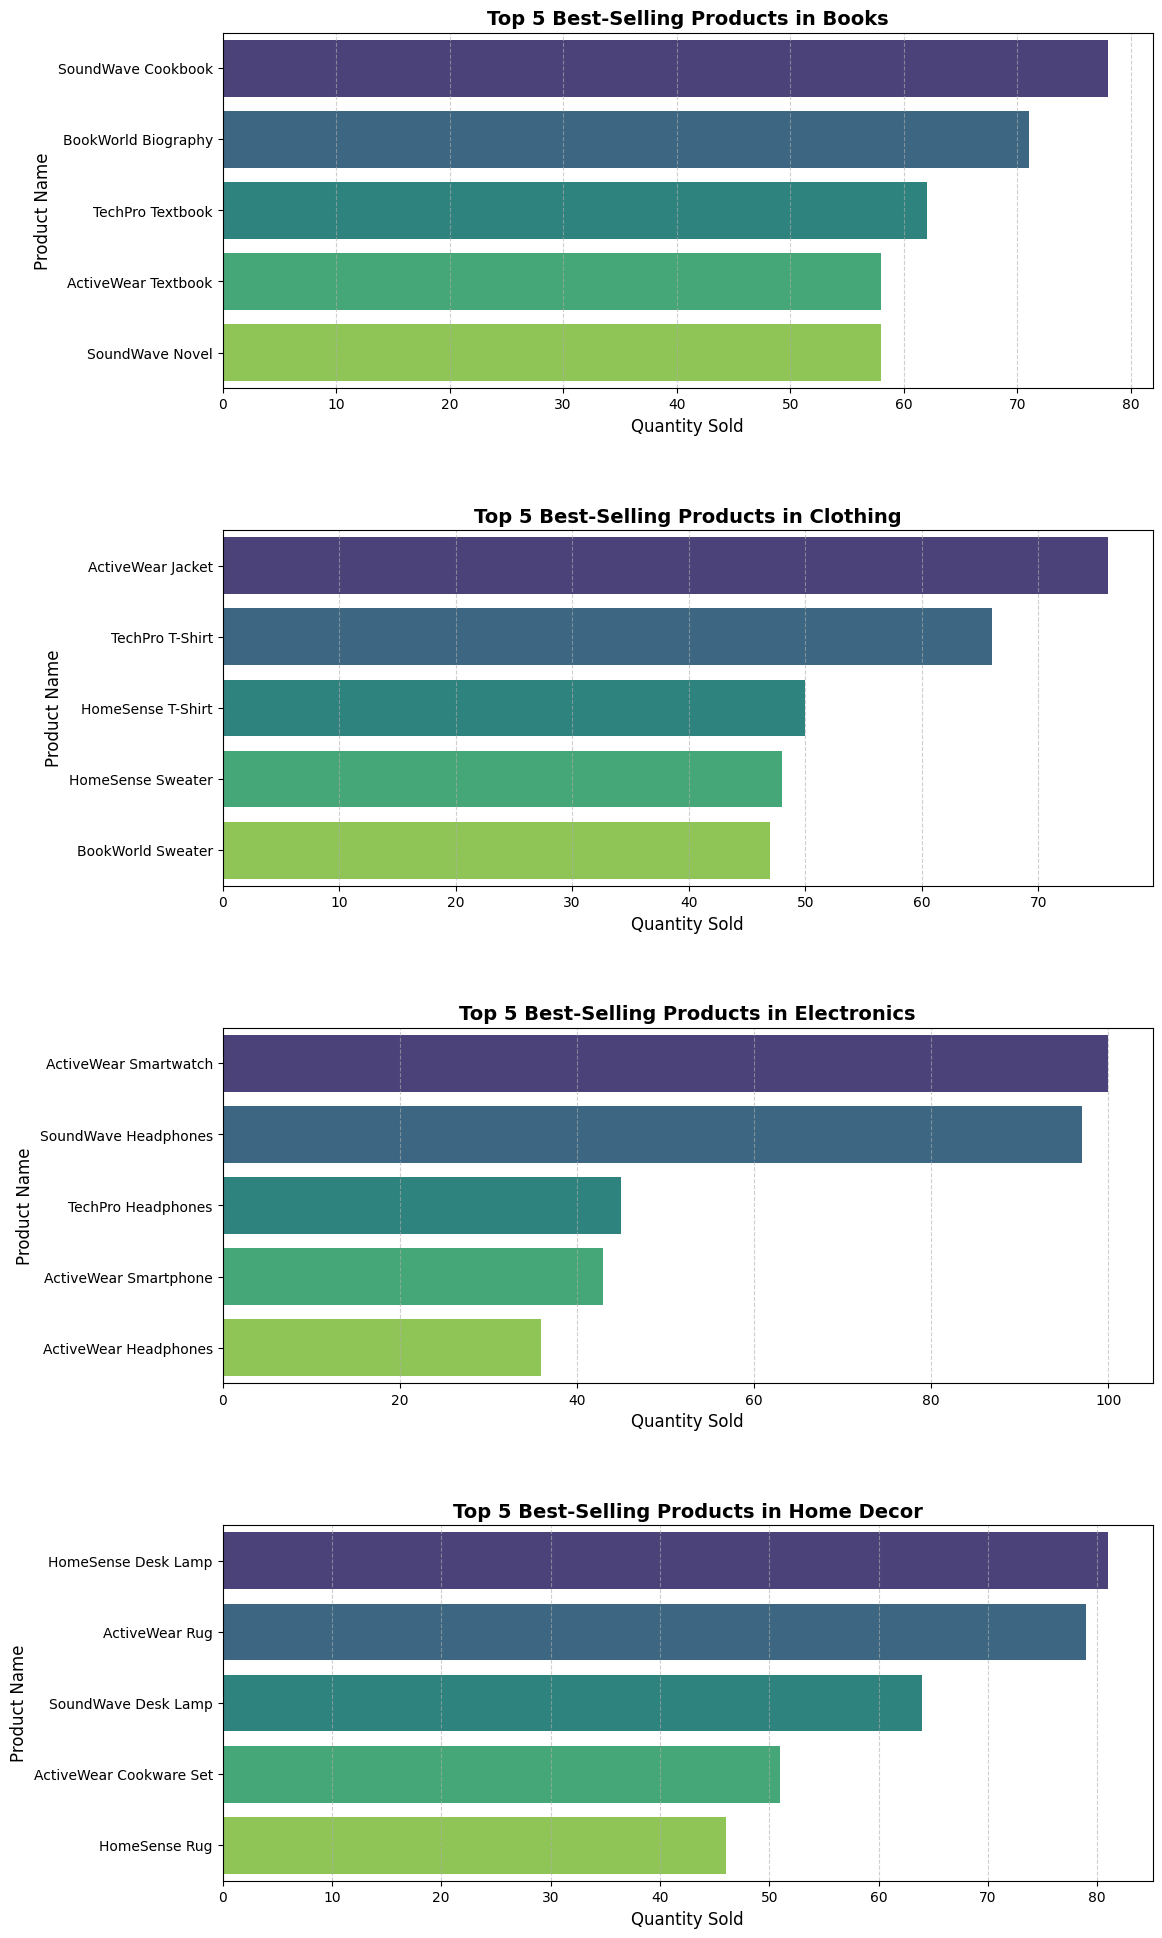

In [ ]:
# Instead of nlargest on the un-aggregated data, first sum by ProductName within each Category
aggregated_df = (
    full_df.groupby(['Category', 'ProductName'], as_index=False, dropna=False)['Quantity']
           .sum()
)

# Now select top 5 by category
top_5_df = (
    aggregated_df
    .sort_values(by=['Category', 'Quantity'], ascending=[True, False])
    .groupby('Category', group_keys=False)
    .apply(lambda x: x.nlargest(5, 'Quantity'))
)

# Then plot
unique_categories = top_5_df['Category'].unique()
n_categories = len(unique_categories)
fig, axes = plt.subplots(n_categories, 1, figsize=(12, 6 * n_categories), squeeze=False)

for i, category in enumerate(unique_categories):
    ax = axes[i][0]
    category_data = top_5_df[top_5_df['Category'] == category]

    sns.barplot(
        data=category_data,
        x='Quantity',
        y='ProductName',
        ax=ax,
        palette='viridis',
        ci=None,      # no error bars
        estimator=sum # or np.sum, if you want to double-check
    )

    ax.set_title(f"Top 5 Best-Selling Products in {category}", fontsize=14, fontweight='bold')
    ax.set_xlabel("Quantity Sold", fontsize=12)
    ax.set_ylabel("Product Name", fontsize=12)
    ax.grid(axis='x', linestyle='--', alpha=0.6)

plt.subplots_adjust(hspace=0.4)
plt.show()
